In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib
import astropy
from astropy.table import Table

font = {        'size'   : 20}
matplotlib.rc('font', **font)

Read in the files for wavelength shifts and wavelength solutions

In [2]:
waveshift_file = 'wavelength_solution_shift.txt'
wavesol_file = 'wavelength_solution_dates.txt'

In [3]:
waveshift_table = Table.read(waveshift_file,format='ascii')
wavesol_table = Table.read(wavesol_file,format='ascii')

In [4]:
# waveshift_table.show_in_notebook()

In [5]:
# wavesol_table

Make table columns to match the filtes and scales to plot colors and markers

In [6]:
filter_marker_list = []
for i in range(len(waveshift_table['Filter'])):
    if waveshift_table['Filter'][i] == 'Kn3':
        filter_marker_list.append('v')
    if waveshift_table['Filter'][i] == 'Kbb':
        filter_marker_list.append('^')
    if waveshift_table['Filter'][i] == 'Jn2':
        filter_marker_list.append('o')
print(filter_marker_list)

['v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'o', '^', 'v', '^', 'v', 'v', 'v', 'v', '^', '^', 'v', 'v', 'v', 'v', 'v', 'v', '^', 'v', 'v', 'v', '^', '^', 'v', 'v', '^']


In [7]:
scale_color_list = []
for i in range(len(waveshift_table['Scale'])):
    if waveshift_table['Scale'][i] == 20:
        scale_color_list.append('C0')
    if waveshift_table['Scale'][i] == 35:
        scale_color_list.append('C1')
    if waveshift_table['Scale'][i] == 50:
        scale_color_list.append('C2')
print(scale_color_list)

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C0', 'C1', 'C1', 'C1', 'C1', 'C1', 'C0', 'C1', 'C1', 'C2', 'C1', 'C1', 'C0', 'C0', 'C1', 'C2', 'C1', 'C0', 'C1', 'C0', 'C1', 'C1', 'C1', 'C0', 'C0', 'C1', 'C1', 'C0']


Make a plot

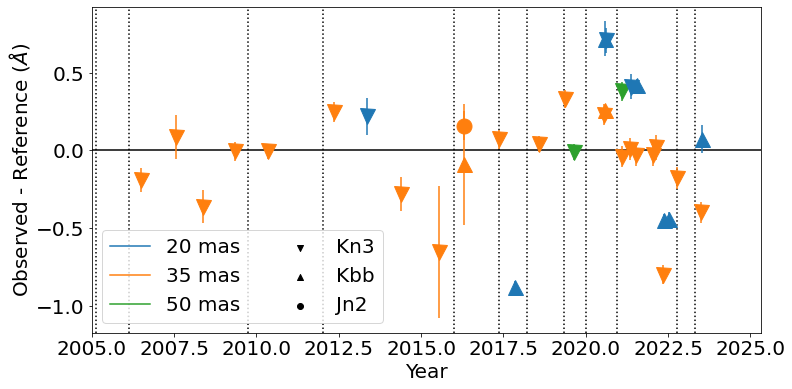

In [8]:
plt.figure(figsize=(12,6))

##background points for making legend
back1 = [0,0]
back2 = [0,0]
##previous plotting style
# plt.plot(back1,back2,color='C0',label = 'Kn3')
# plt.plot(back1,back2,color='C1',label = 'Kbb')
# plt.plot(back1,back2,color='C2',label = 'Jn2')
# # plt.plot(back1,back2,color='black',ls=':',label = 'Wave Sol')
# plt.scatter(back1,back2,color='black',marker='v',label='20 mas')
# plt.scatter(back1,back2,color='black',marker='o',label='35 mas')
# plt.scatter(back1,back2,color='black',marker='^',label='50 mas')

plt.plot(back1,back2,color='C0',label = '20 mas')
plt.plot(back1,back2,color='C1',label = '35 mas')
plt.plot(back1,back2,color='C2',label = '50 mas')
# plt.plot(back1,back2,color='black',ls=':',label = 'Wave Sol')
plt.scatter(back1,back2,color='black',marker='v',label='Kn3')
plt.scatter(back1,back2,color='black',marker='^',label='Kbb')
plt.scatter(back1,back2,color='black',marker='o',label='Jn2')

plt.axhline(y=0,color='black',ls='-')
for i in range(len(wavesol_table)):
    plt.axvline(wavesol_table['ddate'][i],color='black',ls=':')
for i in range(len(waveshift_table['Filter'])):
    plt.errorbar(waveshift_table['DecDate'][i],waveshift_table['Mean'][i],yerr=waveshift_table['Sigma'][i],
                 color=scale_color_list[i], marker=filter_marker_list[i], markersize=15)
plt.legend(loc=3,ncol=2)
plt.xlim(2005,wavesol_table['ddate'][-1] + 2)
plt.xlabel('Year')
plt.ylabel('Observed - Reference ($\AA$)')
plt.savefig('Wavelength_Shift_Time_Dependence.png')

The following code is the same as the main plotting code above, but can be edited to

Text(0, 0.5, 'Observed - Reference ($\\AA$)')

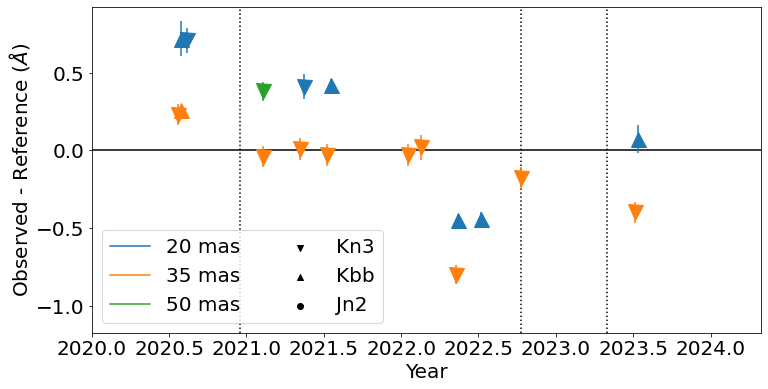

In [11]:
plt.figure(figsize=(12,6))

##background points for making legend
back1 = [0,0]
back2 = [0,0]

plt.plot(back1,back2,color='C0',label = '20 mas')
plt.plot(back1,back2,color='C1',label = '35 mas')
plt.plot(back1,back2,color='C2',label = '50 mas')
# plt.plot(back1,back2,color='black',ls=':',label = 'Wave Sol')
plt.scatter(back1,back2,color='black',marker='v',label='Kn3')
plt.scatter(back1,back2,color='black',marker='^',label='Kbb')
plt.scatter(back1,back2,color='black',marker='o',label='Jn2')

plt.axhline(y=0,color='black',ls='-')
for i in range(len(wavesol_table)):
    plt.axvline(wavesol_table['ddate'][i],color='black',ls=':')
for i in range(len(waveshift_table['Filter'])):
    plt.errorbar(waveshift_table['DecDate'][i],waveshift_table['Mean'][i],yerr=waveshift_table['Sigma'][i],
                 color=scale_color_list[i], marker=filter_marker_list[i], markersize=15)
plt.legend(loc=3,ncol=2)
plt.xlim(2020,wavesol_table['ddate'][-1] + 1)
plt.xlabel('Year')
plt.ylabel('Observed - Reference ($\AA$)')
# plt.savefig('Wavelength_Shift_Time_Dependence.png')